In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy.stats import skew
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency

Saving netflix_titles.csv to netflix_titles (1).csv


In [ ]:
netflix = pd.read_csv('netflix_titles.csv')

# Data Description

In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
netflix.shape

(8807, 12)

In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Data Cleaning


In [ ]:
netflix.drop(columns='director', inplace= True)

In [ ]:
netflix.duplicated().sum()

0

In [ ]:
netflix.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
netflix[netflix.rating.isin(['74 min', '66 min', '84 min', 'nan'])]

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
#netflix['rating'] = netflix['rating'].replace(['74 min'],'TV-MA')

In [ ]:
netflix = netflix.replace({'rating':{'74 min':'TV-MA','66 min':'TV-MA', '84 min':'TV-MA'}})

In [ ]:
netflix.iloc[[5541,5813,5794]]

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,United States,"April 4, 2017",2017,TV-MA,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,United States,"August 15, 2016",2015,TV-MA,NaN,Movies,The comic puts his trademark hilarious/thought...
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,United States,"September 16, 2016",2010,TV-MA,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...


In [ ]:
netflix.iloc[5813, netflix.columns.get_loc('duration')] = '66 min'

In [ ]:
netflix.iloc[5541, netflix.columns.get_loc('duration')] = '74 min'

In [ ]:
netflix.iloc[5794, netflix.columns.get_loc('duration')] = '84 min'

In [ ]:
netflix.iloc[[5541,5813,5794]]

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,United States,"April 4, 2017",2017,TV-MA,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,United States,"August 15, 2016",2015,TV-MA,66 min,Movies,The comic puts his trademark hilarious/thought...
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,United States,"September 16, 2016",2010,TV-MA,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...


# Data Exploration

In [ ]:
netflix_tv = netflix[netflix['type']=='TV Show']
netflix_movie = netflix[netflix['type']=='Movie']
netflix_tv

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [ ]:
netflix_movie

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
netflix.groupby(['listed_in']).count()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,description
listed_in,,,,,,,,,,
Action & Adventure,128,128,128,128,127,128,128,128,128,128
"Action & Adventure, Anime Features",1,1,1,1,0,1,1,1,1,1
"Action & Adventure, Anime Features, Children & Family Movies",4,4,4,4,4,4,4,4,4,4
"Action & Adventure, Anime Features, Classic Movies",2,2,2,2,1,2,2,2,2,2
"Action & Adventure, Anime Features, Horror Movies",1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
"TV Horror, TV Mysteries, Teen TV Shows",1,1,1,1,1,1,1,1,1,1
"TV Horror, Teen TV Shows",2,2,2,2,2,2,2,2,2,2
"TV Sci-Fi & Fantasy, TV Thrillers",1,1,1,1,1,1,1,1,1,1


In [ ]:
netflix.listed_in.value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

In [ ]:
netflix[['rating','title']]

,rating,title
0,PG-13,Dick Johnson Is Dead
1,TV-MA,Blood & Water
2,TV-MA,Ganglands
3,TV-MA,Jailbirds New Orleans
4,TV-MA,Kota Factory
...,...,...
8802,R,Zodiac
8803,TV-Y7,Zombie Dumb
8804,R,Zombieland
8805,PG,Zoom


In [ ]:
netflix.listed_in.value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

In [ ]:
netflix.groupby(['listed_in','type']).count()

,,show_id,title,cast,country,date_added,release_year,rating,duration,description
listed_in,type,,,,,,,,,
Action & Adventure,Movie,128,128,128,127,128,128,128,128,128
"Action & Adventure, Anime Features",Movie,1,1,1,0,1,1,1,1,1
"Action & Adventure, Anime Features, Children & Family Movies",Movie,4,4,4,4,4,4,4,4,4
"Action & Adventure, Anime Features, Classic Movies",Movie,2,2,2,1,2,2,2,2,2
"Action & Adventure, Anime Features, Horror Movies",Movie,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
"TV Horror, TV Mysteries, Teen TV Shows",TV Show,1,1,1,1,1,1,1,1,1
"TV Horror, Teen TV Shows",TV Show,2,2,2,2,2,2,2,2,2
"TV Sci-Fi & Fantasy, TV Thrillers",TV Show,1,1,1,1,1,1,1,1,1


In [ ]:
pd.crosstab(netflix['type'], netflix['listed_in']).sum()

listed_in
Action & Adventure                                              128
Action & Adventure, Anime Features                                1
Action & Adventure, Anime Features, Children & Family Movies      4
Action & Adventure, Anime Features, Classic Movies                2
Action & Adventure, Anime Features, Horror Movies                 1
                                                               ... 
TV Horror, TV Mysteries, Teen TV Shows                            1
TV Horror, Teen TV Shows                                          2
TV Sci-Fi & Fantasy, TV Thrillers                                 1
TV Shows                                                         16
Thrillers                                                        65
Length: 514, dtype: int64

In [ ]:
netflix.groupby('type')['release_year'].value_counts()

type     release_year
Movie    2017            767
         2018            767
         2016            658
         2019            633
         2020            517
                        ... 
TV Show  1979              1
         1981              1
         1985              1
         1989              1
         1991              1
Name: release_year, Length: 119, dtype: int64

In [ ]:
pd.concat([netflix.date_added, netflix.listed_in], axis=1)

,date_added,listed_in
0,"September 25, 2021",Documentaries
1,"September 24, 2021","International TV Shows, TV Dramas, TV Mysteries"
2,"September 24, 2021","Crime TV Shows, International TV Shows, TV Act..."
3,"September 24, 2021","Docuseries, Reality TV"
4,"September 24, 2021","International TV Shows, Romantic TV Shows, TV ..."
...,...,...
8802,"November 20, 2019","Cult Movies, Dramas, Thrillers"
8803,"July 1, 2019","Kids' TV, Korean TV Shows, TV Comedies"
8804,"November 1, 2019","Comedies, Horror Movies"
8805,"January 11, 2020","Children & Family Movies, Comedies"


In [ ]:
netflix.sort_values(by='type')

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
5641,s5642,Movie,Under the Shadow,"Narges Rashidi, Avin Manshadi, Bobby Naderi, R...","United Kingdom, Jordan, Qatar, Iran","January 7, 2017",2016,PG-13,84 min,"Horror Movies, International Movies, Thrillers","During the Iran-Iraq conflict, a Tehran woman ..."
5639,s5640,Movie,Jim Gaffigan: Cinco,Jim Gaffigan,United States,"January 10, 2017",2017,TV-14,74 min,Stand-Up Comedy,America's king of clean comedy delivers wicked...
5638,s5639,Movie,Very Big Shot,"Alain Saadeh, Fouad Yammine, Tarek Yaacoub, Al...","Lebanon, Qatar","January 12, 2017",2015,TV-MA,109 min,"Comedies, Dramas, International Movies",When three brothers struggling to go straight ...
5637,s5638,Movie,Clinical,"Vinessa Shaw, Kevin Rahm, William Atherton, Aa...",United States,"January 13, 2017",2017,TV-MA,104 min,"Horror Movies, Thrillers",A psychiatrist is plagued by flashbacks to a t...
...,...,...,...,...,...,...,...,...,...,...,...
2406,s2407,TV Show,Lenox Hill,NaN,United States,"June 10, 2020",2020,TV-MA,1 Season,"Docuseries, Reality TV, Science & Nature TV",Four doctors at New York's storied Lenox Hill ...
5777,s5778,TV Show,Someone Like You,"Kingone Wang, Lorene Ren, Sean Lee, Nita Lei, ...",Taiwan,"October 1, 2016",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",After losing his sight and his fiancee in an a...
2405,s2406,TV Show,DC's Legends of Tomorrow,"Victor Garber, Brandon Routh, Caity Lotz, Fran...",United States,"June 10, 2020",2020,TV-14,5 Seasons,"TV Action & Adventure, TV Sci-Fi & Fantasy","A mysterious ""time master"" from the future uni..."
5730,s5731,TV Show,Love Family,"Chris Wang, Serena Fang, Jack Lee, Amanda Chou...",Taiwan,"November 1, 2016",2013,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...",A wealthy heir's search for a nameless childho...


# Questions to be answered


---





# **question #1: Over the years, which type of media has netflix added to it's library more Movies or TV shows ?**

---



In [ ]:
netflix.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
testing = netflix.type.value_counts()
testing

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
netflix_tv[['release_year','type']].value_counts()

release_year  type   
2020          TV Show    436
2019          TV Show    397
2018          TV Show    380
2021          TV Show    315
2017          TV Show    265
2016          TV Show    244
2015          TV Show    162
2014          TV Show     88
2012          TV Show     64
2013          TV Show     63
2011          TV Show     40
2010          TV Show     40
2009          TV Show     34
2008          TV Show     23
2007          TV Show     14
2006          TV Show     14
2005          TV Show     13
2003          TV Show     10
2004          TV Show      9
2002          TV Show      7
1999          TV Show      7
2001          TV Show      5
1997          TV Show      4
1993          TV Show      4
1998          TV Show      4
2000          TV Show      4
1990          TV Show      3
1992          TV Show      3
1996          TV Show      3
1994          TV Show      2
1995          TV Show      2
1988          TV Show      2
1986          TV Show      2
1977          TV Show

In [ ]:
explode = (0.05, 0.05)

The process of exploding a pie chart is splitting it into parts. For this, we use the explode attribute and assign it to an appropriate value.



If we want to rotate the pie chart to a different angle, use this attribute with its appropriate value.

Syntax:

plot(kind='pie', startangle)

fig size changes pie size

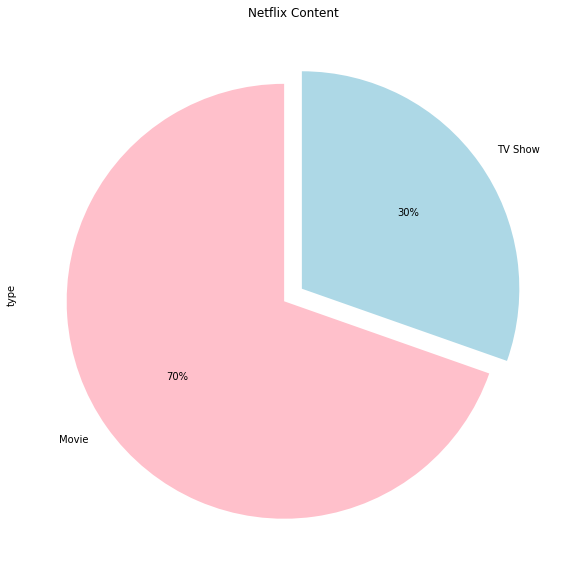

In [ ]:
testing.plot(kind='pie',title='Netflix Content',figsize=(20,10),autopct='%1.0f%%',colors=['pink','lightblue'],startangle=90,explode=explode)

In [ ]:
netflix.groupby('type')['release_year'].value_counts()

type     release_year
Movie    2017            767
         2018            767
         2016            658
         2019            633
         2020            517
                        ... 
TV Show  1979              1
         1981              1
         1985              1
         1989              1
         1991              1
Name: release_year, Length: 119, dtype: int64

In [ ]:
netflix_movie[['release_year','type']].value_counts()

release_year  type 
2018          Movie    767
2017          Movie    767
2016          Movie    658
2019          Movie    633
2020          Movie    517
                      ... 
1961          Movie      1
1963          Movie      1
1966          Movie      1
1947          Movie      1
1946          Movie      1
Length: 73, dtype: int64

# **Question #2:Who is Netflix's core audience? Who is Netflix providing the most content for?**
---





In [ ]:
netflix.rating.value_counts()

TV-MA       3210
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [ ]:
netflix.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', nan, 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
netflix[netflix.rating.isin(['G', 'TV-G'])]

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,NaN,India,"September 15, 2021",2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...
75,s76,Movie,You vs. Wild: Out Cold,"Bear Grylls, Jason Derek Prempeh",NaN,"September 14, 2021",2021,TV-G,106 min,Children & Family Movies,"After a plane crash leaves Bear with amnesia, ..."
106,s107,TV Show,Bunk'd,"Peyton List, Karan Brar, Skai Jackson, Miranda...",United States,"September 5, 2021",2021,TV-G,5 Seasons,"Kids' TV, TV Comedies","The Ross siblings of Disney's hit series ""Jess..."
107,s108,Movie,A Champion Heart,"Mandy Grace, David de Vos, Donna Rusch, Devan ...",United States,"September 4, 2021",2018,G,90 min,"Children & Family Movies, Dramas",When a grieving teen must work off her debt to...
108,s109,TV Show,Dive Club,"Aubri Ibrag, Sana'a Shaik, Miah Madden, Mercy ...",Australia,"September 3, 2021",2021,TV-G,1 Season,"Kids' TV, TV Dramas, Teen TV Shows","On the shores of Cape Mercy, a skillful group ..."
...,...,...,...,...,...,...,...,...,...,...,...
8669,s8670,TV Show,V.R. Troopers,"Michael Sorich, Gardner Baldwin, Mike Reynolds...",United States,"January 1, 2016",1995,TV-G,2 Seasons,Kids' TV,Three friends who study martial arts find them...
8702,s8703,Movie,Waterschool,NaN,"United States, Brazil, India, Uganda, China","July 25, 2018",2018,TV-G,68 min,Documentaries,"Six young women, who each live near one of Ear..."
8745,s8746,Movie,Willy Wonka & the Chocolate Factory,"Gene Wilder, Jack Albertson, Peter Ostrum, Roy...","United States, East Germany, West Germany","January 1, 2020",1971,G,100 min,"Children & Family Movies, Classic Movies, Come...",Zany Willy Wonka causes a stir when he announc...
8747,s8748,TV Show,Winsanity,Donald Faison,United States,"December 15, 2018",2016,TV-G,1 Season,Reality TV,Actor Donald Faison hosts this game show in wh...


In [ ]:
netflix_tv[['rating','type']].value_counts()

rating    type   
TV-MA     TV Show    1145
TV-14     TV Show     733
TV-PG     TV Show     323
TV-Y7     TV Show     195
TV-Y      TV Show     176
TV-G      TV Show      94
NR        TV Show       5
R         TV Show       2
TV-Y7-FV  TV Show       1
dtype: int64

In [ ]:
netflix_movie[['rating','type']].value_counts()

rating    type 
TV-MA     Movie    2065
TV-14     Movie    1427
R         Movie     797
TV-PG     Movie     540
PG-13     Movie     490
PG        Movie     287
TV-Y7     Movie     139
TV-Y      Movie     131
TV-G      Movie     126
NR        Movie      75
G         Movie      41
TV-Y7-FV  Movie       5
NC-17     Movie       3
UR        Movie       3
dtype: int64

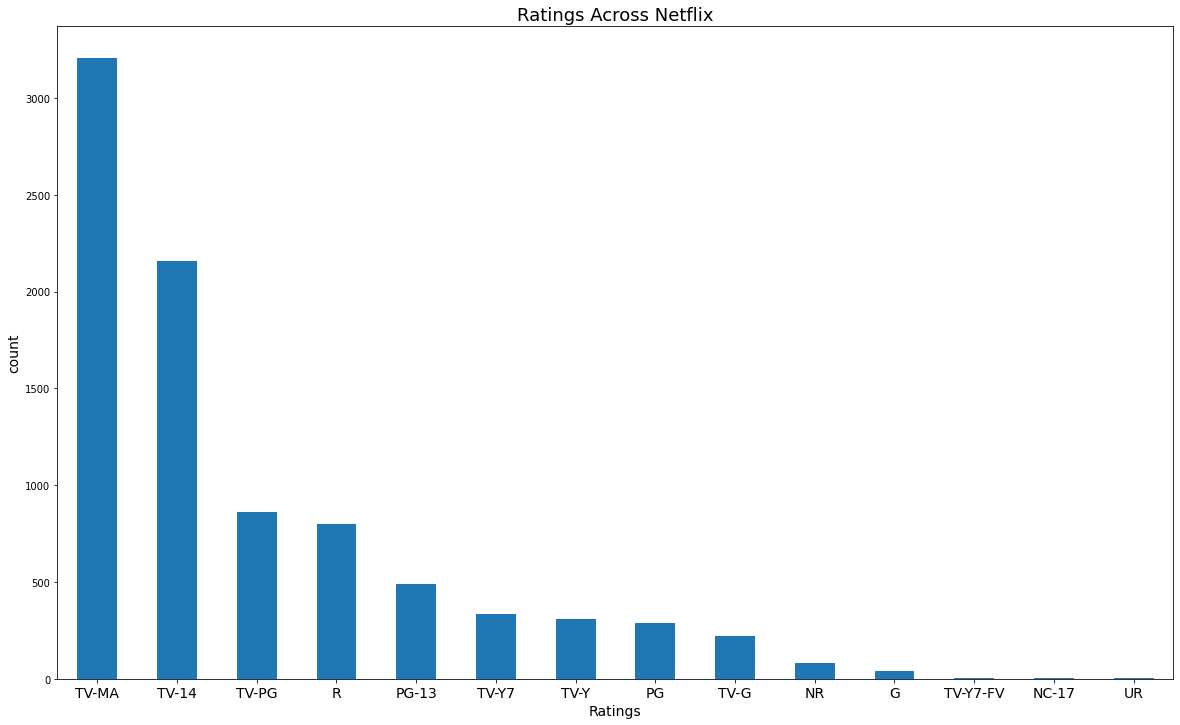

In [ ]:
plt.figure(figsize=(20,12))
netflix.rating.value_counts().plot(kind ='bar')
plt.title('Ratings Across Netflix',fontsize=18)
plt.xlabel('Ratings',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.xticks(rotation=360,fontsize=14)
plt.show()

# **Question #3: Which genre does Netflix produce the most of?**


---



In [ ]:
netflix.listed_in.count()

8807

In [ ]:
netflix.listed_in.unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [ ]:
netflix['listed_in'].str.get_dummies(sep=',').sum()

 Anime Features               50
 Children & Family Movies     36
 Classic & Cult TV             6
 Classic Movies               36
 Comedies                    464
                            ... 
TV Dramas                     67
TV Horror                     11
TV Sci-Fi & Fantasy            1
TV Shows                      16
Thrillers                     65
Length: 73, dtype: int64

In [ ]:
netflix_tv.listed_in.count()

2676

In [ ]:
s = netflix_tv['listed_in'].str.replace(' ', '').str.get_dummies(sep=',').sum()

In [ ]:
s.sort_values(ascending=False, inplace=True)
s

InternationalTVShows        1351
TVDramas                     763
TVComedies                   581
CrimeTVShows                 470
Kids'TV                      451
Docuseries                   395
RomanticTVShows              370
RealityTV                    255
BritishTVShows               253
AnimeSeries                  176
Spanish-LanguageTVShows      174
TVAction&Adventure           168
KoreanTVShows                151
TVMysteries                   98
Science&NatureTV              92
TVSci-Fi&Fantasy              84
TVHorror                      75
TeenTVShows                   69
TVThrillers                   57
Stand-UpComedy&TalkShows      56
Classic&CultTV                28
TVShows                       16
dtype: int64

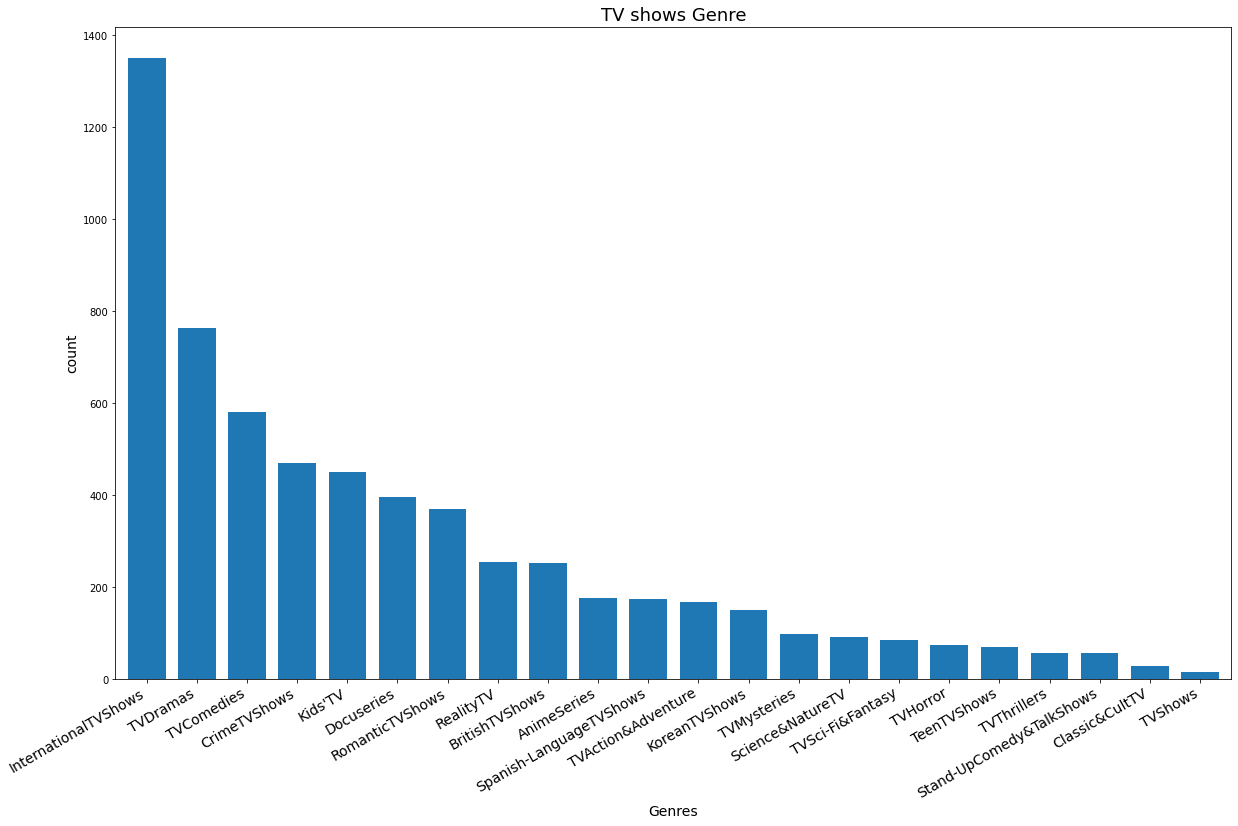

In [ ]:
plt.figure(figsize=(20,12))
s.plot(kind ='bar',width= 0.75)
plt.title('TV shows Genre',fontsize=18)
plt.xlabel('Genres',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.xticks(rotation=30, ha='right',fontsize=14)
plt.show()

In [ ]:
y = netflix_movie['listed_in'].str.replace(' ', '').str.get_dummies(sep=',').sum()
y.sort_values(ascending=False, inplace=True)
y

InternationalMovies      2752
Dramas                   2427
Comedies                 1674
Documentaries             869
Action&Adventure          859
IndependentMovies         756
Children&FamilyMovies     641
RomanticMovies            616
Thrillers                 577
Music&Musicals            375
HorrorMovies              357
Stand-UpComedy            343
Sci-Fi&Fantasy            243
SportsMovies              219
ClassicMovies             116
LGBTQMovies               102
CultMovies                 71
AnimeFeatures              71
Faith&Spirituality         65
Movies                     57
dtype: int64

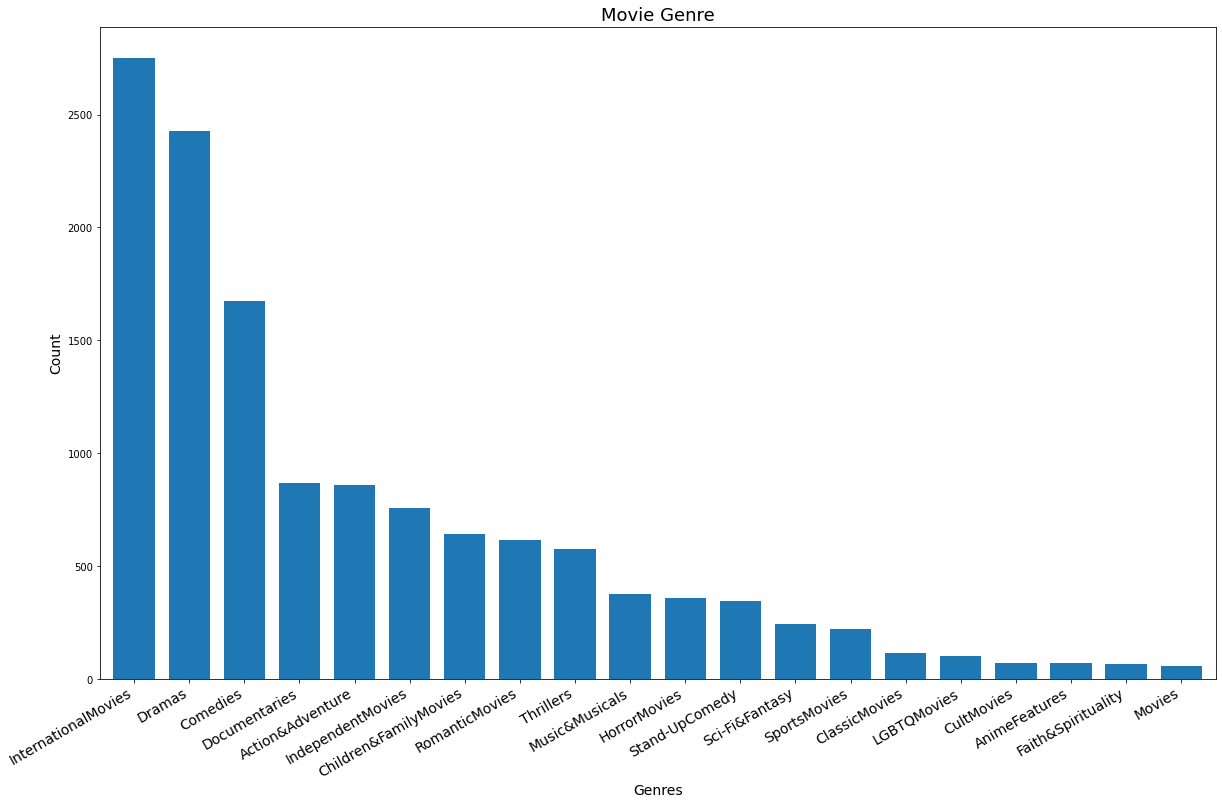

In [ ]:
plt.figure(figsize=(20,12))
y.plot(kind ='bar',width= 0.75)
plt.title('Movie Genre',fontsize=18)
plt.xlabel('Genres',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(rotation=30, ha='right',fontsize=14)
plt.show()

In [ ]:
#save to csv
#netflix.to_csv('netflix_cleaned.csv',encoding='utf-8')